# **DL Lab 5**
## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**

In [1]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import keras_tuner as kt
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf

## **Question 1**

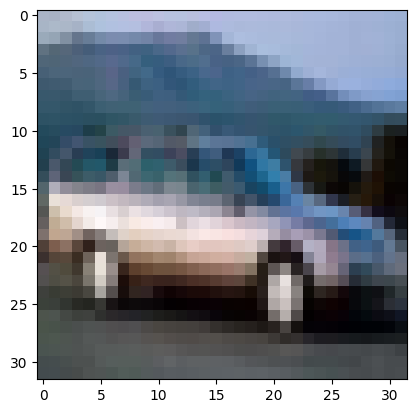

In [2]:
batch_size = 128
num_classes = 10
epochs = 10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
plt.imshow(X_train[4])
plt.show()


In [3]:
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(256, activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation= "relu")) 
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-5, mode= 'min', patience=4, verbose = 1, restore_best_weights=True)


In [ ]:
model.compile(loss='CategoricalCrossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
hist = model.fit(X_train, y_train_cat, verbose=1, batch_size=128, epochs=500, validation_data=(X_test, y_test_cat), callbacks=[estop])

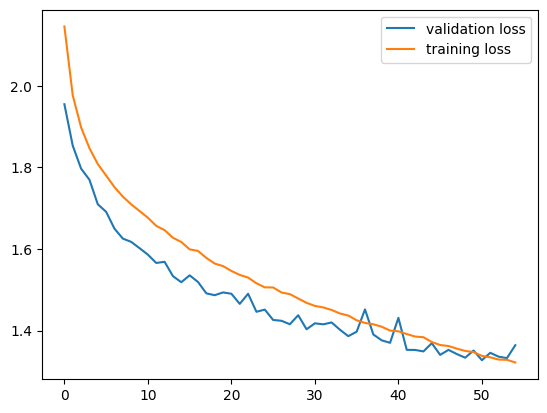

In [7]:
plt.plot(hist.history['val_loss'], label=('validation loss'))
plt.plot(hist.history['loss'], label=('training loss'))
plt.legend()
plt.show()

## **Question 2**

In [14]:
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
        initial_learning_rate=0.01,
        decay_steps=5,
        end_learning_rate=0.001,
        power=1.0,
        cycle=False
    )
for step in range(10):
    print(f"Step {step}, LR={lr_schedule(step).numpy()}")


Step 0, LR=0.009999999776482582
Step 1, LR=0.008200000040233135
Step 2, LR=0.006400000303983688
Step 3, LR=0.004599999636411667
Step 4, LR=0.00279999990016222
Step 5, LR=0.0010000000474974513
Step 6, LR=0.0010000000474974513
Step 7, LR=0.0010000000474974513
Step 8, LR=0.0010000000474974513
Step 9, LR=0.0010000000474974513


In [15]:
optimizer = SGD(learning_rate=lr_schedule)
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-5, mode= 'min', patience=4, verbose = 1, restore_best_weights=True)

In [16]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(3072,)))
model2.add(Dropout(0.3))
model2.add(Dense(256, activation= "relu"))
model2.add(Dropout(0.3))
model2.add(Dense(128, activation= "relu"))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer=optimizer, loss='CategoricalCrossentropy', metrics=['accuracy'])
hist2 = model2.fit(X_train, y_train_cat, verbose=1, batch_size=128, epochs=100, validation_data=(X_test, y_test_cat), callbacks=[estop])

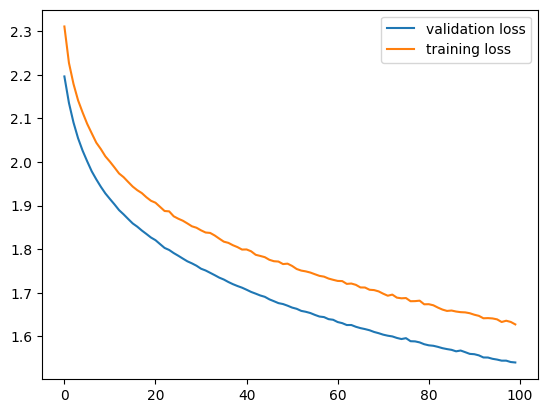

In [23]:
plt.plot(hist2.history['val_loss'], label=('validation loss'))
plt.plot(hist2.history['loss'], label=('training loss'))
plt.legend()
plt.show()

## **Question 3**

In [18]:
lr_schedule2 = tf.keras.optimizers.schedules.PolynomialDecay(
        initial_learning_rate=0.01,
        decay_steps=5,
        end_learning_rate=0.001,
        power=2.0,
        cycle=False
    )
for step in range(10):
    print(f"Step {step}, LR={lr_schedule2(step).numpy()}")

Step 0, LR=0.009999999776482582
Step 1, LR=0.006760000251233578
Step 2, LR=0.004240000154823065
Step 3, LR=0.0024399999529123306
Step 4, LR=0.0013599999947473407
Step 5, LR=0.0010000000474974513
Step 6, LR=0.0010000000474974513
Step 7, LR=0.0010000000474974513
Step 8, LR=0.0010000000474974513
Step 9, LR=0.0010000000474974513


In [21]:
optimizer2 = SGD(learning_rate=lr_schedule2)
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-5, mode= 'min', patience=4, verbose = 1, restore_best_weights=True)

In [20]:
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(3072,)))
model3.add(Dropout(0.3))
model3.add(Dense(256, activation= "relu"))
model3.add(Dropout(0.3))
model3.add(Dense(128, activation= "relu"))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))
model3.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer=optimizer2, loss='CategoricalCrossentropy', metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train_cat, verbose=1, batch_size=128, epochs=100, validation_data=(X_test, y_test_cat), callbacks=[estop])

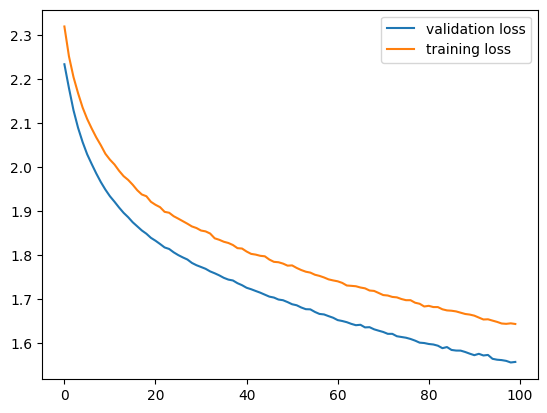

In [29]:
plt.plot(hist3.history['val_loss'], label=('validation loss'))
plt.plot(hist3.history['loss'], label=('training loss'))
plt.legend()
plt.show()

## **Question 4**

In [ ]:
lr_schedule3 = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps=10,
        decay_rate=0.96,
        staircase=True
    )
for step in range(0, 6000):
    print(f"Step {step}, LR={lr_schedule3(step).numpy()}")

In [26]:
optimizer3 = SGD(learning_rate=lr_schedule3)
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-5, mode= 'min', patience=4, verbose = 1, restore_best_weights=True)

In [27]:
model4 = Sequential()
model4.add(Dense(512, activation='relu', input_shape=(3072,)))
model4.add(Dropout(0.3))
model4.add(Dense(256, activation= "relu"))
model4.add(Dropout(0.3))
model4.add(Dense(128, activation= "relu"))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='softmax'))
model4.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model4.compile(optimizer=optimizer3, loss='CategoricalCrossentropy', metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train_cat, verbose=1, batch_size=128, epochs=100, validation_data=(X_test, y_test_cat), callbacks=[estop])

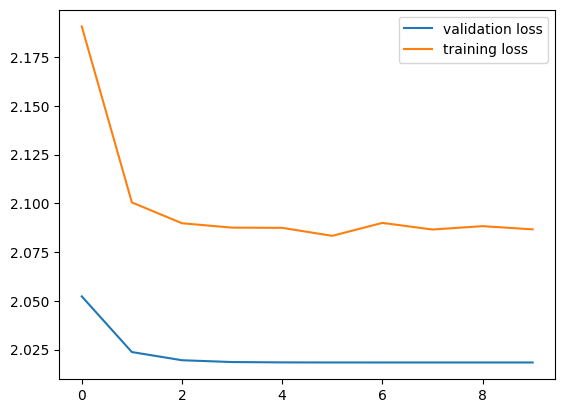

In [31]:
plt.plot(hist4.history['val_loss'], label=('validation loss'))
plt.plot(hist4.history['loss'], label=('training loss'))
plt.legend()
plt.show()

## **Question 5a**

In [33]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [34]:
model5 = Sequential()
model5.add(Dense(512, activation='relu', input_shape=(3072,)))
model5.add(Dropout(0.3))
model5.add(Dense(256, activation= "relu"))
model5.add(Dropout(0.3))
model5.add(Dense(128, activation= "relu"))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation='softmax'))
model5.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_delta=0.01,
    verbose=1,
    min_lr=1e-5
)

In [ ]:
optimizer4 = SGD(learning_rate=0.01)
model5.compile(optimizer=optimizer4, loss='CategoricalCrossentropy', metrics=['accuracy'])
hist5 = model5.fit(X_train, y_train_cat, verbose=1, batch_size=64, epochs=50, validation_data=(X_test, y_test_cat), callbacks=[reduce_lr])

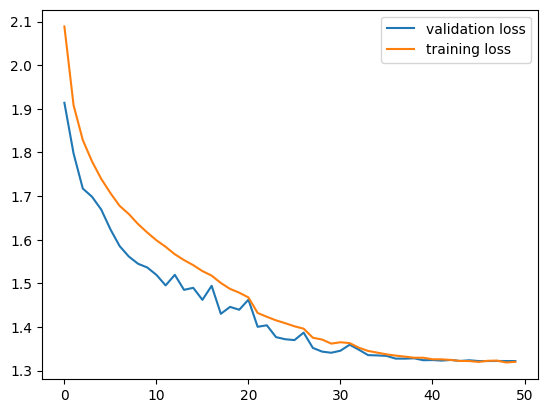

In [38]:
plt.plot(hist5.history['val_loss'], label=('validation loss'))
plt.plot(hist5.history['loss'], label=('training loss'))
plt.legend()
plt.show()

## **Question 5**

### **Classical Momentum**

In [42]:
optimizer5 = SGD(
    learning_rate=0.01,
    momentum=0.9
)

In [43]:
model6 = Sequential()
model6.add(Dense(512, activation='relu', input_shape=(3072,)))
model6.add(Dropout(0.3))
model6.add(Dense(256, activation= "relu"))
model6.add(Dropout(0.3))
model6.add(Dense(128, activation= "relu"))
model6.add(Dropout(0.2))
model6.add(Dense(10, activation='softmax'))
model6.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model6.compile(optimizer=optimizer5, loss='CategoricalCrossentropy', metrics=['accuracy'])
hist6 = model6.fit(X_train, y_train_cat, verbose=1, batch_size=64, epochs=50, validation_data=(X_test, y_test_cat), callbacks=[reduce_lr])

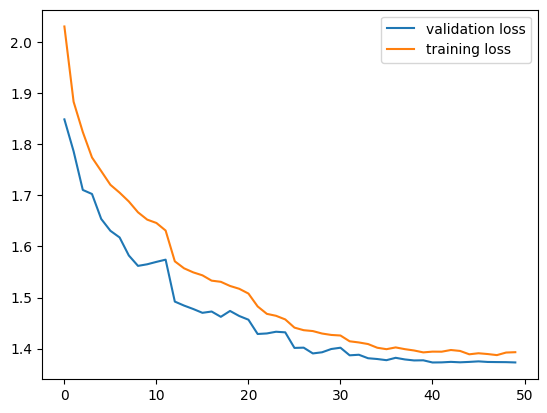

In [46]:
plt.plot(hist6.history['val_loss'], label=('validation loss'))
plt.plot(hist6.history['loss'], label=('training loss'))
plt.legend()
plt.show()

### **Nesterov Momentum**

In [49]:
optimizer6 = SGD(
    learning_rate=0.01,
    momentum=0.9,
    nesterov=True
)

In [48]:
model7 = Sequential()
model7.add(Dense(512, activation='relu', input_shape=(3072,)))
model7.add(Dropout(0.3))
model7.add(Dense(256, activation= "relu"))
model7.add(Dropout(0.3))
model7.add(Dense(128, activation= "relu"))
model7.add(Dropout(0.2))
model7.add(Dense(10, activation='softmax'))
model7.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model7.compile(optimizer=optimizer6, loss='CategoricalCrossentropy', metrics=['accuracy'])
hist7 = model7.fit(X_train, y_train_cat, verbose=1, batch_size=64, epochs=50, validation_data=(X_test, y_test_cat), callbacks=[reduce_lr])

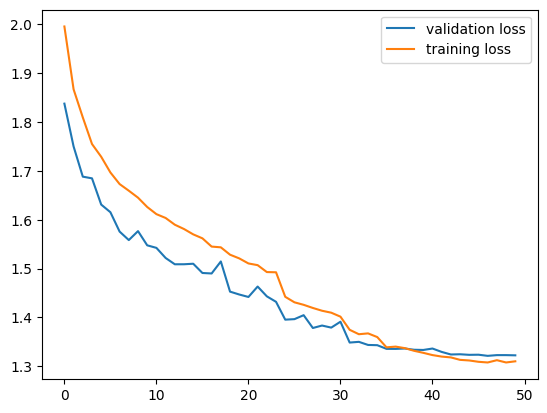

In [51]:
plt.plot(hist7.history['val_loss'], label=('validation loss'))
plt.plot(hist7.history['loss'], label=('training loss'))
plt.legend()
plt.show()

## **Challenging question**

In [57]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return (y_pred - y_true)

In [58]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])  

y = np.array([[0], [1], [1], [0]])  

np.random.seed(42)
w = np.random.randn(2, 1) 
b = np.random.randn()      

epochs = 100
lr = 0.1
momentum = 0.9

v_w = np.zeros_like(w)
v_b = 0.0  

print("Initial Weights:", w.ravel(), "Bias:", b)

Initial Weights: [ 0.49671415 -0.1382643 ] Bias: 0.6476885381006925


In [59]:
# CLASSICAL MOMENTUM TRAINING 
print("\nTraining with Momentum")
for epoch in range(epochs):
    total_loss = 0
    
    for i in range(len(X)):
        xi = X[i].reshape(1, -1)   
        yi = y[i]

        z = np.dot(xi, w) + b
        y_pred = sigmoid(z)

        loss = mse(yi, y_pred)
        total_loss += loss

        dL_dy = mse_derivative(yi, y_pred) 
        dy_dz = sigmoid_derivative(z)      

        dL_dz = dL_dy * dy_dz            
        dL_dw = xi.T * dL_dz            
        dL_db = dL_dz.item()            

        v_w = momentum * v_w - lr * dL_dw
        v_b = momentum * v_b - lr * dL_db

        w += v_w
        b += v_b

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss={total_loss/len(X):.4f}")


# ---- NESTEROV MOMENTUM TRAINING ---- #
w = np.random.randn(2, 1)
b = np.random.randn()
v_w = np.zeros_like(w)
v_b = 0.0

print("\nTraining with Nesterov Momentum")
for epoch in range(epochs):
    total_loss = 0
    
    for i in range(len(X)):
        xi = X[i].reshape(1, -1)
        yi = y[i]

        w_lookahead = w + momentum * v_w
        b_lookahead = b + momentum * v_b

        z = np.dot(xi, w_lookahead) + b_lookahead
        y_pred = sigmoid(z)

        loss = mse(yi, y_pred)
        total_loss += loss

        dL_dy = mse_derivative(yi, y_pred)
        dy_dz = sigmoid_derivative(z)

        dL_dz = dL_dy * dy_dz
        dL_dw = xi.T * dL_dz
        dL_db = dL_dz.item()

        v_w = momentum * v_w - lr * dL_dw
        v_b = momentum * v_b - lr * dL_db

        w += v_w
        b += v_b

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss={total_loss/len(X):.4f}")



Training with Momentum
Epoch 0, Loss=0.2929
Epoch 20, Loss=0.2534
Epoch 40, Loss=0.2532
Epoch 60, Loss=0.2531
Epoch 80, Loss=0.2531

Training with Nesterov Momentum
Epoch 0, Loss=0.2980
Epoch 20, Loss=0.2607
Epoch 40, Loss=0.2564
Epoch 60, Loss=0.2560
Epoch 80, Loss=0.2560
